<a href="https://colab.research.google.com/github/moinur25/Data-Analysis-with-STATA/blob/main/House_Sales_in_King_County%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project goal :  You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on.



**Importing Data Sets**


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/kc_house_data.csv')

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


**Variable Label**


id - Unique ID for each home sold,
date - Date of the home sale,
price - Price of each home sold,
bedrooms - Number of bedrooms,
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower,
sqft_living - Square footage of the apartments ,interior living space,
sqft_lot - Square footage of the land space,
floors - Number of floors,
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not,
view - An index from 0 to 4 of how good the view of the property was,
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level,
sqft_basement - The square footage of the interior housing space that is below ground level,
yr_built - The year the house was initially built,
yr_renovated - The year of the house’s last renovation,
zipcode - What zipcode area the house is in,
lat - Lattitude,
long - Longitude,
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors,

verified from 2 sources:
https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices
https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.htm









In [4]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


**Data Visualization**

<ipython-input-15-f04b5fc878b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

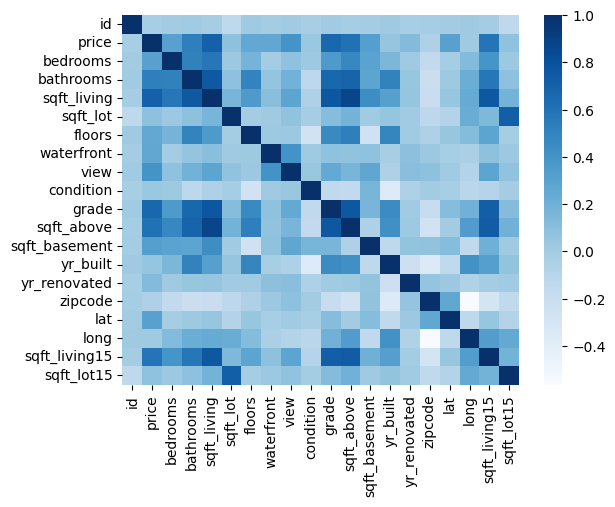

In [15]:

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='Blues')



<Axes: xlabel='bedrooms', ylabel='price'>

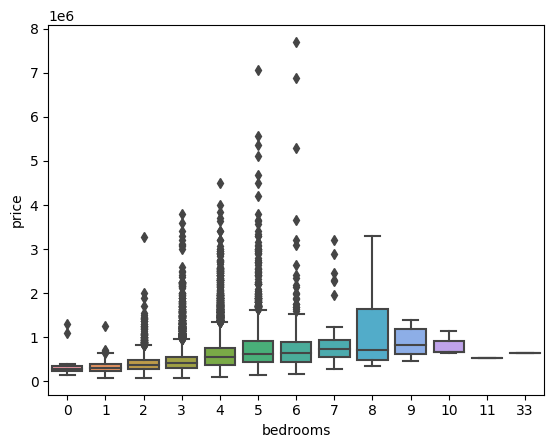

In [16]:
sns.boxplot(x='bedrooms',y='price', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

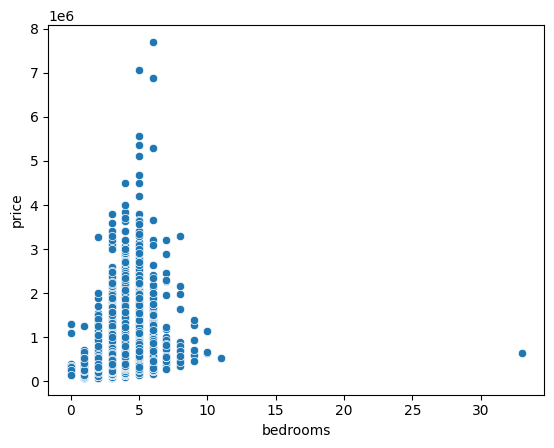

In [17]:
sns.scatterplot(x='bedrooms', y='price',data=df)

<Axes: xlabel='sqft_living', ylabel='price'>

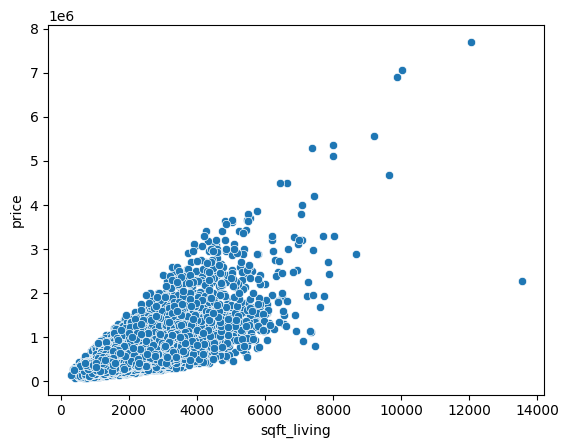

In [18]:
sns.scatterplot(x='sqft_living', y='price', data=df)

<Axes: xlabel='grade', ylabel='price'>

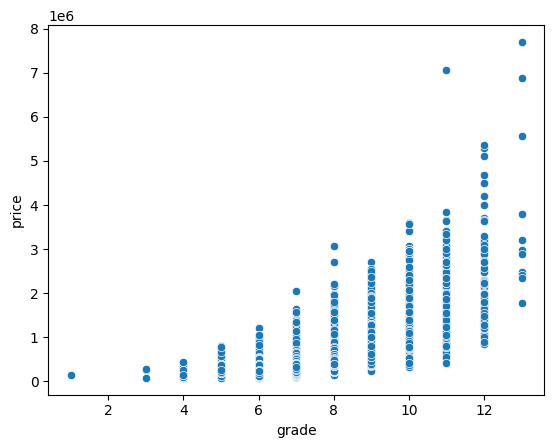

In [19]:
sns.scatterplot(x='grade', y='price', data=df)

<Axes: xlabel='sqft_living15', ylabel='price'>

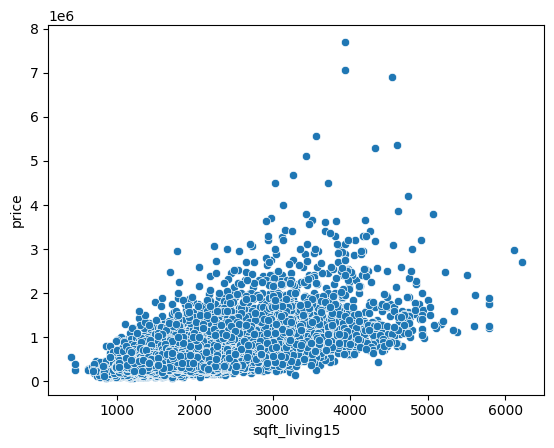

In [20]:
sns.scatterplot(x='sqft_living15', y='price', data=df)

From above this correlation analysis we can express that there has some of correlated variable. price and sqft_living variables are strongly correlated. also here have some correlated variable with price variable among grade, sqft_above, sqft_living15

<Axes: xlabel='waterfront', ylabel='price'>

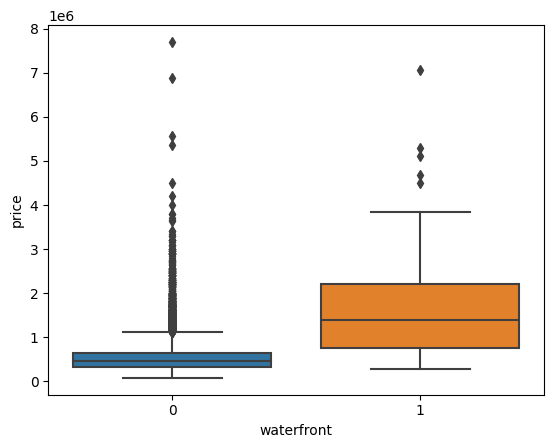

In [21]:
sns.boxplot(x='waterfront',y='price',data=df)

**Model** **Development**

In [22]:

X=df[['sqft_living']]
Y=df[['price']]
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.49286538652201417

In [23]:
X=df[['grade']]
Y=df[['price']]
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.44550650957913185

**Model Evaluation and Refinement**

In [24]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [26]:
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 5404
number of training samples: 16209


In [68]:
model = LinearRegression()
model=model.fit(x_train, y_train)




In [62]:
print("coefficient:", model.coef_)
print("Intercept:", model.intercept_)

coefficient: [-2.45365169e+04  5.94991421e+05  6.81524575e+05 -2.38872847e+04
  6.45019025e+14  6.36549066e+04 -7.10788608e+03  1.68901764e+00
  6.45019025e+14  8.19496789e+04 -6.45019025e+14]
Intercept: -32789840.11604664


In [28]:
y_pred = model.predict(x_test)
print(y_pred)

[650671.88395336 513071.88395336 805039.88395336 ... 797103.88395336
   6703.88395336 497839.88395336]


In [54]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 56694927763.27593
Root Mean Squared Error: 238106.96706160434
R^2 Score: 0.6463087577844011


In [29]:
alpha = 1.0  # Regularization parameter (you can adjust this)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(x_train, y_train)

Ridge()

In [42]:
print("Coefficient:", ridge_model.coef_)
print("intercept:", ridge_model.intercept_)

Coefficient: [-2.49386847e+04  5.87902447e+05  6.79224037e+05 -2.38278964e+04
  6.29707961e+01  6.38868581e+04 -7.11852644e+03  2.02125685e+00
  6.39876422e+01  8.19717671e+04  1.26960046e+02]
intercept: -32680477.628976922


In [51]:
y_pred2 = ridge_model.predict(x_test)
print(y_pred2)

[650916.32062386 512744.6752252  805450.13838427 ... 796837.71511962
   7736.76207605 496731.25893859]


In [56]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("Mean Squared Error:", mse)
print(r2)

Mean Squared Error: 56691921681.13363
0.6463275112244187
